MultinomialNB

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [89]:
texts = [
    "I really enjoyed using this product",
    "The quality is outstanding and impressive",
    "Customer service made me very happy",
    "This item gives great value for money",
    "I am fully satisfied with my purchase",

    "I strongly dislike this product",
    "The quality is poor and unacceptable",
    "Customer support was very disappointing",
    "This was the worst service experience",
    "I am not satisfied with this purchase"
]

labels = [1,1,1,1,1, 0,0,0,0,0]   # 1 = Positive, 0 = Negative


In [90]:
data = pd.DataFrame({
    "Text": texts,
    "Sentiment": labels
})


In [91]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Text"])
y = np.array(labels)


In [92]:
model = MultinomialNB()
model.fit(X, y)


MultinomialNB()

In [93]:
mystery_text = ["The product quality is excellent"]
X_test = vectorizer.transform(mystery_text)

probabilities = model.predict_proba(X_test)
prediction = model.predict(X_test)

print("Mystery Sentence:", mystery_text[0])
print(f"Probability of Negative: {probabilities[0][0]*100:.2f}%")
print(f"Probability of Positive: {probabilities[0][1]*100:.2f}%")
print("Predicted Sentiment:", "Positive" if prediction[0] == 1 else "Negative")


Mystery Sentence: The product quality is excellent
Probability of Negative: 64.18%
Probability of Positive: 35.82%
Predicted Sentiment: Negative


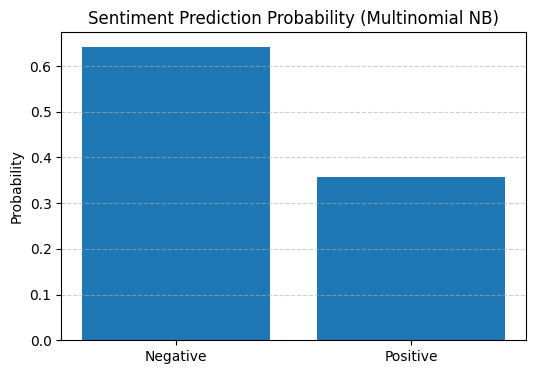

In [94]:
plt.figure(figsize=(6,4))
classes = ["Negative", "Positive"]
plt.bar(classes, probabilities[0])
plt.title("Sentiment Prediction Probability (Multinomial NB)")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


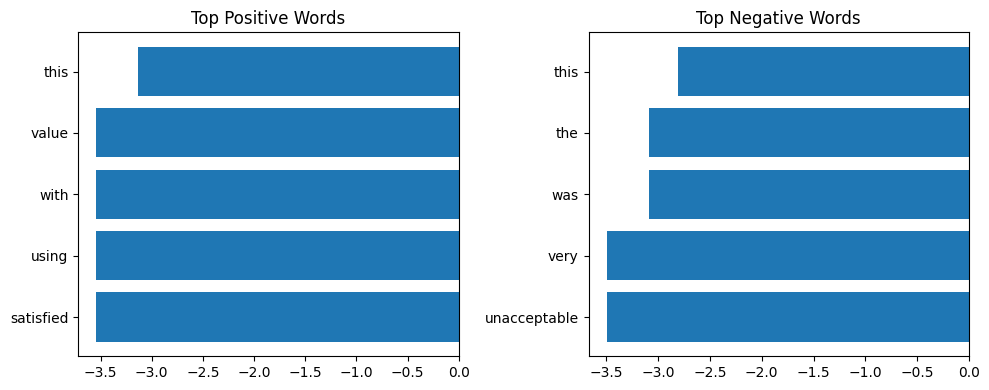

In [95]:
feature_names = np.array(vectorizer.get_feature_names_out())
log_probs = model.feature_log_prob_

top_positive = feature_names[np.argsort(log_probs[1])[-5:]]
top_negative = feature_names[np.argsort(log_probs[0])[-5:]]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.barh(top_positive, sorted(log_probs[1])[-5:])
plt.title("Top Positive Words")

plt.subplot(1,2,2)
plt.barh(top_negative, sorted(log_probs[0])[-5:])
plt.title("Top Negative Words")

plt.tight_layout()
plt.show()


BernoulliNB

In [96]:
from sklearn.naive_bayes import BernoulliNB


In [97]:
texts = [
    "I loved watching this movie",
    "The film was really entertaining",
    "The acting and storyline were great",
    "I enjoyed every scene of the movie",
    "Direction and visuals were excellent",

    "I hated watching this movie",
    "The film was boring and terrible",
    "The acting and story were very poor",
    "This was the worst movie experience",
    "I did not like this movie at all"
]

labels = [1,1,1,1,1, 0,0,0,0,0]


In [98]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(texts)
y = np.array(labels)


In [99]:
model = BernoulliNB()
model.fit(X, y)


BernoulliNB()

In [100]:
mystery_text = ["The movie has good acting"]
X_test = vectorizer.transform(mystery_text)

probabilities = model.predict_proba(X_test)
prediction = model.predict(X_test)

print("Mystery Sentence:", mystery_text[0])
print(f"Probability of Negative: {probabilities[0][0]*100:.2f}%")
print(f"Probability of Positive: {probabilities[0][1]*100:.2f}%")
print("Predicted Sentiment:", "Positive" if prediction[0] == 1 else "Negative")


Mystery Sentence: The movie has good acting
Probability of Negative: 40.00%
Probability of Positive: 60.00%
Predicted Sentiment: Positive


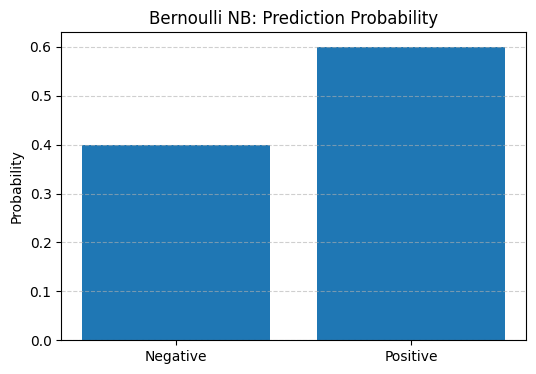

In [101]:
plt.figure(figsize=(6,4))
classes = ["Negative", "Positive"]
plt.bar(classes, probabilities[0])
plt.title("Bernoulli NB: Prediction Probability")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


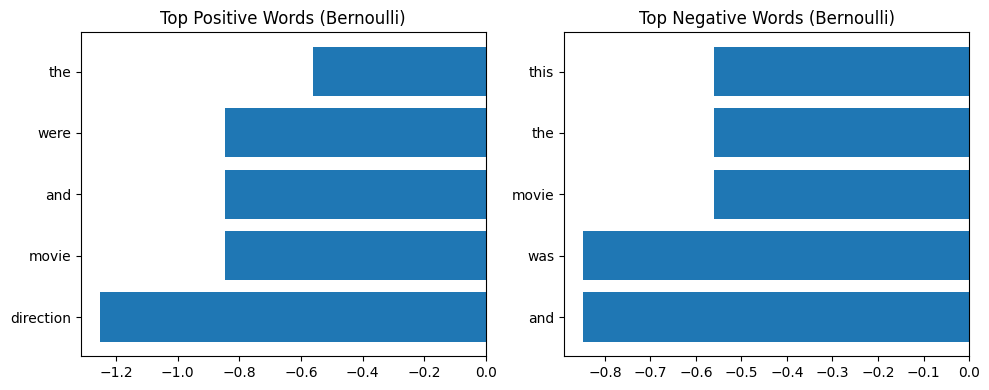

In [102]:
feature_names = np.array(vectorizer.get_feature_names_out())
log_probs = model.feature_log_prob_

top_positive = feature_names[np.argsort(log_probs[1])[-5:]]
top_negative = feature_names[np.argsort(log_probs[0])[-5:]]

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.barh(top_positive, sorted(log_probs[1])[-5:])
plt.title("Top Positive Words (Bernoulli)")

plt.subplot(1,2,2)
plt.barh(top_negative, sorted(log_probs[0])[-5:])
plt.title("Top Negative Words (Bernoulli)")

plt.tight_layout()
plt.show()
